In [115]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [116]:
def plot(file):
    with open (file) as f:
        requests_data = json.load(f)
    
    df = pd.DataFrame(requests_data)
    df = df.drop(index=0).reset_index(drop=True)
    df['moving_average'] = df['response_time'].rolling(window=1).mean()
    
    # Filter the DataFrame for status code 200
    df_200 = df[df['status_code'] == 200]
    
    # Filter the DataFrame for status code 502
    df_502 = df[df['status_code'] == 502]
    
    # Plot the response times for status code 200
    plt.figure(figsize=(10, 6))
    plt.plot(df_200.index, df_200['moving_average'], label='Status Code 200')
    
    # Plot the points for status code 502 as big yellow dots
    plt.scatter(df_502.index, df_502['response_time'], color='yellow', s=50, label='Status Code 502')
    
    # Customizing the plot
    plt.xlabel('Index')
    plt.ylabel('Moving Average')
    plt.title('Response Time for Status Code 200 with Status Code 502 Highlighted')
    plt.legend()
    plt.show()


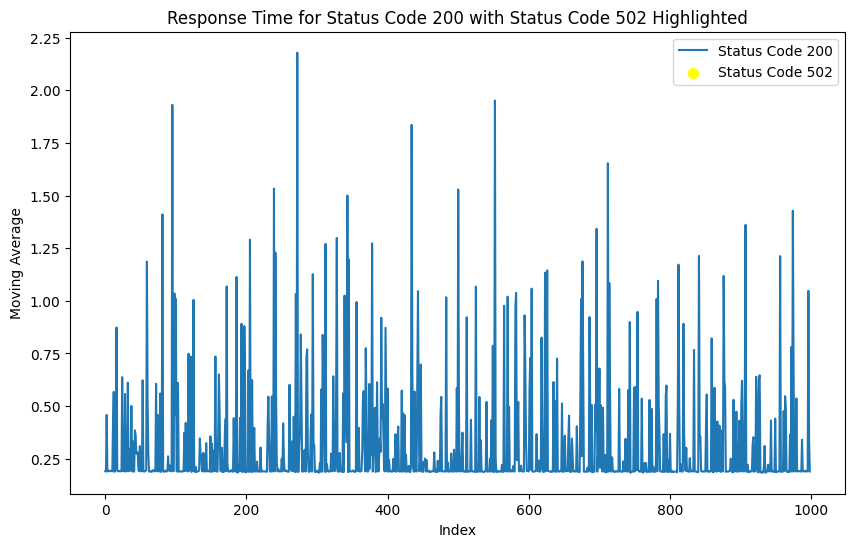

In [117]:
plot("response_times_1.json")

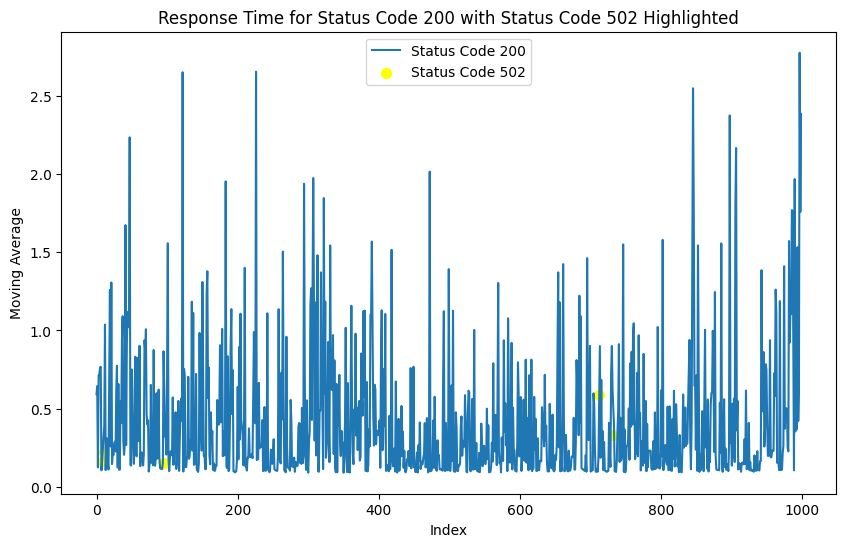

In [111]:
plot("response_times_10.json")

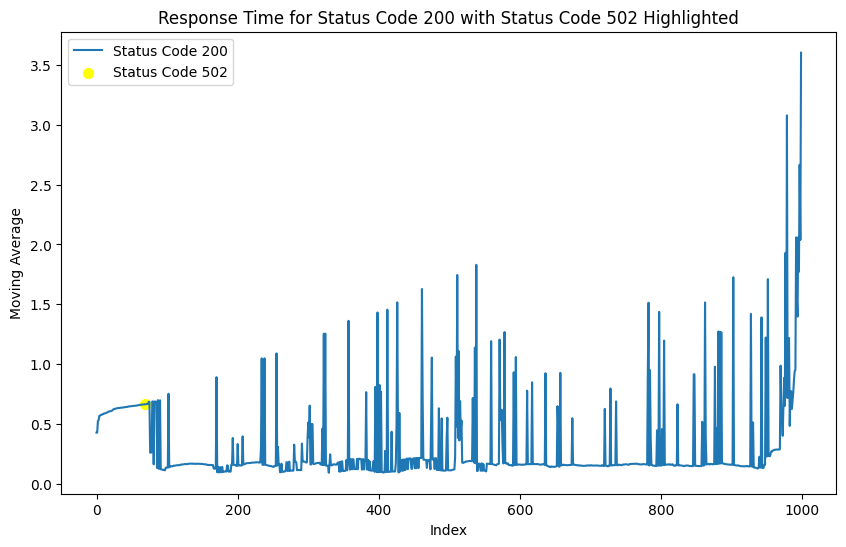

In [112]:
plot("response_times_100.json")

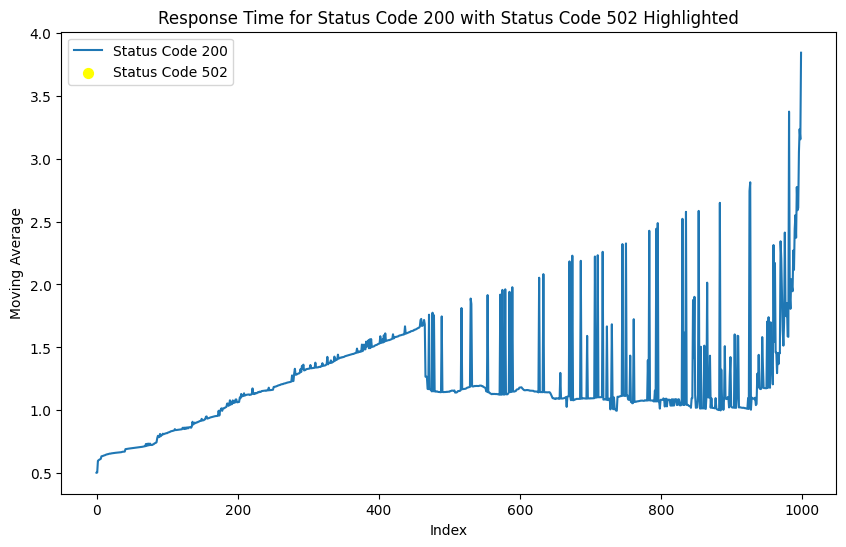

In [113]:
plot("response_times_500.json")

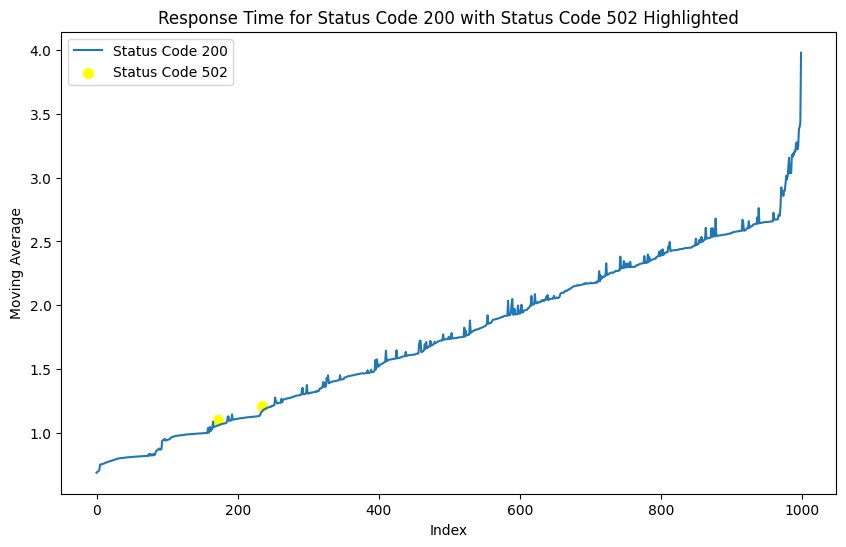

In [114]:
plot("response_times_1000.json")